# Installing tools that will be used for the Analysis and reading the dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import neattext as nt
import neattext.functions as nfx

pd.reset_option("max_columns")

import warnings


In [2]:
dataset = pd.read_excel("vaccine.xlsx", sheet_name=3)

In [3]:
dataset.shape

(1685, 13)

In [4]:
dataset.head()

,Respondent,Age,Gender,COVID-19 Jab?,Race,Any reason for Hesitation,Reasons for Hesitation,Hesistation Status,Trust Level,Safety Level,Confidence Level,Accessibility,Obstacles
0,Staff,19,2,1,White,1.0,Different things about my health in the long run,NaN,Mostly trust,Mostly safe,Somewhat confident,Making appointments,Me being an hour and a half away from campus
1,Student,20,2,0,White,2.0,NaN,3.0,Mostly trust,Very safe,Very confident,NaN,inability to have transportation to vaccinatio...
2,Student,19,1,0,White,2.0,NaN,3.0,Mostly trust,Very safe,Very confident,If we were allowed to be exempt from classes f...,Scheduling
3,Student,44,1,0,White,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
4,Staff,30,1,1,White,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


# Filling the Missing Values

In [5]:
dataset.fillna(method='ffill', inplace=True)

In [6]:
dataset.isnull().sum()

Respondent                   0
Age                          0
Gender                       0
COVID-19 Jab?                0
Race                         0
Any reason for Hesitation    0
Reasons for Hesitation       0
Hesistation Status           1
Trust Level                  0
Safety Level                 0
Confidence Level             0
Accessibility                0
Obstacles                    0
dtype: int64

# Identifying the number of Staff and Students that took the Vaccine

In [7]:
Hesistation_freq = dataset[["Reasons for Hesitation", "COVID-19 Jab?", "Respondent"]]
Hesistation_freq.groupby(['COVID-19 Jab?', 'Respondent']).count()

Reasons for Hesitation
COVID-19 Jab? Respondent                        
0             Staff                           99
              Student                       1041
1             Staff                          266
              Student                        279

## Text cleaning


In [8]:

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abideen.muhammed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:

#remove currency
dataset["Reasons for Hesitation"]=dataset["Reasons for Hesitation"].apply(nfx.remove_currency_symbols)
dataset["Reasons for Hesitation"]=dataset["Reasons for Hesitation"].apply(nfx.remove_stopwords)
dataset["Reasons for Hesitation"]=dataset["Reasons for Hesitation"].apply(nfx.remove_numbers)
dataset["Reasons for Hesitation"]=dataset["Reasons for Hesitation"].apply(nfx.remove_currencies)
dataset["Reasons for Hesitation"]=dataset["Reasons for Hesitation"].apply(nfx.remove_bad_quotes)
dataset["Reasons for Hesitation"]=dataset["Reasons for Hesitation"].apply(nfx.remove_special_characters)

dataset["Obstacles"]=dataset["Obstacles"].apply(nfx.remove_currency_symbols)
dataset["Obstacles"]=dataset["Obstacles"].apply(nfx.remove_stopwords)
dataset["Obstacles"]=dataset["Obstacles"].apply(nfx.remove_numbers)
dataset["Obstacles"]=dataset["Obstacles"].apply(nfx.remove_currencies)
dataset["Obstacles"]=dataset["Obstacles"].apply(nfx.remove_bad_quotes)
dataset["Obstacles"]=dataset["Obstacles"].apply(nfx.remove_bad_quotes)
dataset["Obstacles"]=dataset["Obstacles"].apply(nfx.remove_special_characters)


dataset["Accessibility "]=dataset["Accessibility "].apply(nfx.remove_currency_symbols)
dataset["Accessibility "]=dataset["Accessibility "].apply(nfx.remove_stopwords)
dataset["Accessibility "]=dataset["Accessibility "].apply(nfx.remove_numbers)
dataset["Accessibility "]=dataset["Accessibility "].apply(nfx.remove_currencies)
dataset["Accessibility "]=dataset["Accessibility "].apply(nfx.remove_bad_quotes)
dataset["Accessibility "]=dataset["Accessibility "].apply(nfx.remove_special_characters)


In [10]:
dataset["Accessibility "].unique()

array(['Making appointments', 'allowed exempt classes day',
       'streamlined clinic makes getting vaccine simple situation',
       'Email updates eligibility', 'distributed hours early later  Ex  ',
       'Good Info',
       'harmful effects infertility perfectly healthy want new conditions arise vaccine thats year',
       'location close campus possible', 'places vaccine',
       'tested housing', 'sure', 'Invite email', 'Week school',
       'Appt times receive', 'walkability', 'appointment times',
       'Close home', 'location', 'parking', 'Close distance',
       'Nothing needed order receive vaccine', 'Na', 'plan getting',
       'campus site', 'information safety vaccine', 'want date vaccine',
       'proximity campus', 'Appalachian state campus Boone', 'Idk',
       'available campus', 'vaccine given campus',
       'told covid vaccine takes location', 'transportation',
       'medical setting receive', 'available times long wait times',
       'Flexible time slots', 'Fle

## Tokenization

In [11]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abideen.muhammed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abideen.muhammed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
dataset["Obstacles_tk"] = [word_tokenize(i) for i in dataset["Obstacles"]]
dataset["Reasons for Hesitation_tk"] = [word_tokenize(i) for i in dataset["Reasons for Hesitation"]]
dataset["Accessibility_tk "] = [word_tokenize(i) for i in dataset["Accessibility "]]

In [13]:
print(dataset["Obstacles_tk"])

0                            [hour, half, away, campus]
1       [inability, transportation, vaccination, sites]
2                                          [Scheduling]
3                                          [Scheduling]
4                                          [Scheduling]
                             ...                       
1680                      [vaccines, offered, oncampus]
1681                      [vaccines, offered, oncampus]
1682                      [vaccines, offered, oncampus]
1683                      [vaccines, offered, oncampus]
1684                      [vaccines, offered, oncampus]
Name: Obstacles_tk, Length: 1685, dtype: object


# Lemmatization

In [14]:
# import these modules
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer  
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\abideen.muhammed\AppData\Roaming\nltk_data...


In [15]:
for i in dataset["Obstacles"]:
    print("Original Word: {} \t Lemmatized word:{}".format(i, lemmatizer.lemmatize(i)))

Original Word: hour half away campus 	 Lemmatized word:hour half away campus
Original Word: inability transportation vaccination sites 	 Lemmatized word:inability transportation vaccination sites
Original Word: Scheduling 	 Lemmatized word:Scheduling
Original Word: Scheduling 	 Lemmatized word:Scheduling
Original Word: Scheduling 	 Lemmatized word:Scheduling
Original Word: Scheduling 	 Lemmatized word:Scheduling
Original Word: personal phobia needles biggest hurdle 	 Lemmatized word:personal phobia needles biggest hurdle
Original Word: personal phobia needles biggest hurdle 	 Lemmatized word:personal phobia needles biggest hurdle
Original Word: Lack communication appointment availability 	 Lemmatized word:Lack communication appointment availability
Original Word: Lack communication appointment availability 	 Lemmatized word:Lack communication appointment availability
Original Word: Lack communication appointment availability 	 Lemmatized word:Lack communication appointment availability

In [16]:
for i in dataset["Obstacles"]:
    print("Original Word: {} \t Lemmatized word:{}".format(i, lemmatizer.lemmatize(i, pos='v')))

Original Word: hour half away campus 	 Lemmatized word:hour half away campus
Original Word: inability transportation vaccination sites 	 Lemmatized word:inability transportation vaccination sites
Original Word: Scheduling 	 Lemmatized word:Scheduling
Original Word: Scheduling 	 Lemmatized word:Scheduling
Original Word: Scheduling 	 Lemmatized word:Scheduling
Original Word: Scheduling 	 Lemmatized word:Scheduling
Original Word: personal phobia needles biggest hurdle 	 Lemmatized word:personal phobia needles biggest hurdle
Original Word: personal phobia needles biggest hurdle 	 Lemmatized word:personal phobia needles biggest hurdle
Original Word: Lack communication appointment availability 	 Lemmatized word:Lack communication appointment availability
Original Word: Lack communication appointment availability 	 Lemmatized word:Lack communication appointment availability
Original Word: Lack communication appointment availability 	 Lemmatized word:Lack communication appointment availability

Original Word: makes difficult opinion year research vaccines young worried long term affects 	 Lemmatized word:makes difficult opinion year research vaccines young worried long term affects
Original Word: makes difficult opinion year research vaccines young worried long term affects 	 Lemmatized word:makes difficult opinion year research vaccines young worried long term affects
Original Word: travel far campus it 	 Lemmatized word:travel far campus it
Original Word: Transportation 	 Lemmatized word:Transportation
Original Word: Transportation 	 Lemmatized word:Transportation
Original Word: time slots 	 Lemmatized word:time slots
Original Word: early morning stay Boone 	 Lemmatized word:early morning stay Boone
Original Word: early morning stay Boone 	 Lemmatized word:early morning stay Boone
Original Word: early morning stay Boone 	 Lemmatized word:early morning stay Boone
Original Word: early morning stay Boone 	 Lemmatized word:early morning stay Boone
Original Word: early morning s

# Word Cloud

In [17]:
#!pip install wordcloud

In [18]:
# lets plot the Wordscloud


# for Wordscloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

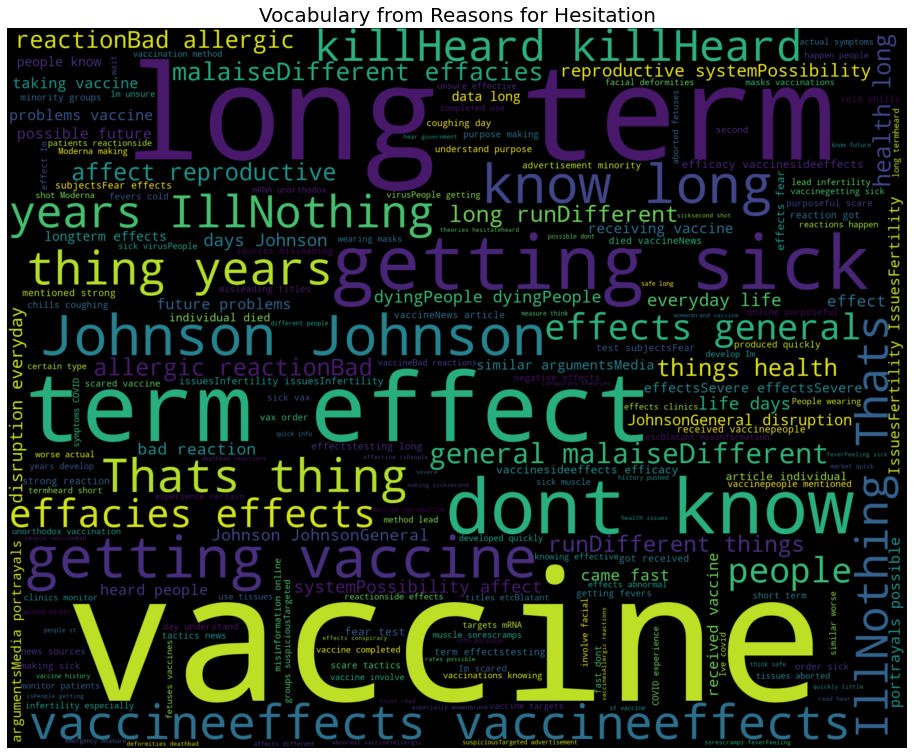

In [19]:
wordcloud =WordCloud(stopwords = stopwords , width=2000 , height=1600, background_color="black").generate(''.join(dataset['Reasons for Hesitation']))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout (pad=0)
plt.title("Vocabulary from Reasons for Hesitation", fontsize = 20)
plt.show()

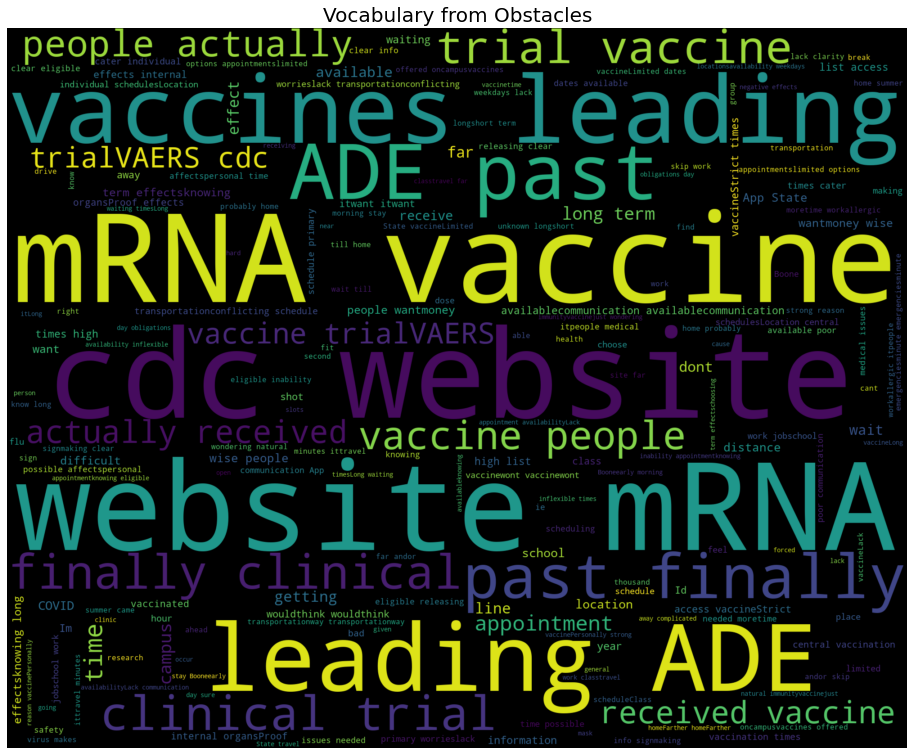

In [20]:
wordcloud =WordCloud(stopwords = stopwords , width=2000 , height=1600, background_color="black").generate(''.join(dataset['Obstacles']))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout (pad=0)
plt.title("Vocabulary from Obstacles", fontsize = 20)
plt.show()

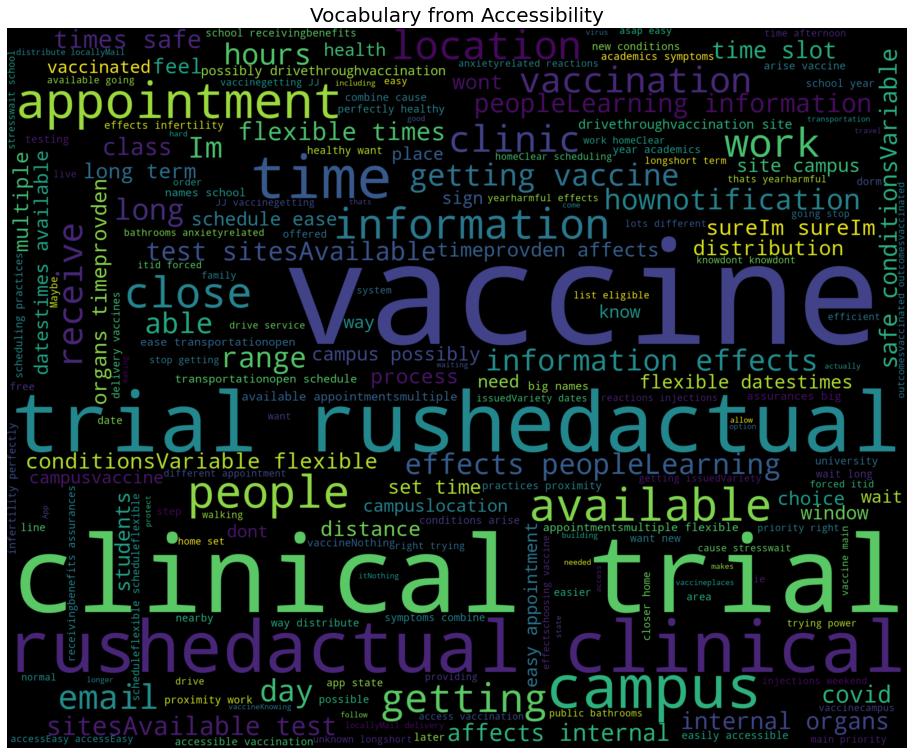

In [21]:
wordcloud =WordCloud(stopwords = stopwords , width=2000 , height=1600, background_color="black").generate(''.join(dataset['Accessibility ']))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout (pad=0)
plt.title("Vocabulary from Accessibility", fontsize = 20)
plt.show()

# Commonest Words

In [22]:
from collections import Counter


# In[ ]:


def comm(d,n=30):
    doc = Counter(d)
    common = doc.most_common(n)

    return common


# In[ ]:


comm(dataset['Reasons for Hesitation'])







[('effects', 45),
 ('effects vaccine', 30),
 ('Nothing Thats thing years Ill', 24),
 ('Heard kill', 24),
 ('Different effacies effects general malaise', 20),
 ('People dying', 18),
 ('Bad allergic reaction', 18),
 ('Different things health long run', 17),
 ('Possibility affect reproductive system', 17),
 ('affects', 16),
 ('General disruption everyday life days Johnson  Johnson', 16),
 ('Infertility', 15),
 ('Media portrayals possible future problems vaccine and similar arguments',
  14),
 ('Infertility issues', 14),
 ('sideeffects efficacy vaccine', 13),
 ('Severe effects', 13),
 ('Fear effects fear test subjects', 12),
 ('Fertility Issues', 12),
 ('testing long term effects', 12),
 ('News article individual died vaccine', 12),
 ('infertility', 11),
 ('people mentioned strong reaction got received vaccine', 11),
 ('People getting fevers cold chills coughing day understand purpose making sick vax order sick virus',
  10),
 ('Weird symptoms', 10),
 ('heard short term effect Im scared va

In [23]:
comm(dataset['Obstacles'])

[('', 137),
 ('VAERS cdc website mRNA vaccines leading ADE past finally clinical trial vaccine  people actually received vaccine trial',
  88),
 ('Transportation', 22),
 ('knowing long term effects', 15),
 ('School', 15),
 ('money wise people want', 14),
 ('communication available', 13),
 ('think would', 12),
 ('want it', 12),
 ('advertising', 12),
 ('Scheduling', 11),
 ('Location', 11),
 ('Strict times high list access vaccine', 11),
 ('sure', 10),
 ('Proof effects internal organs', 10),
 ('Distance', 9),
 ('wont vaccine', 9),
 ('campus', 8),
 ('Time', 8),
 ('Location central vaccination times cater individual schedules', 8),
 ('lack transportationconflicting schedule primary worries', 8),
 ('Nothing', 7),
 ('far away', 7),
 ('Availability', 7),
 ('school work job', 7),
 ('way transportation', 7),
 ('minute emergencies', 7),
 ('personal time possible affects', 7),
 ('Farther home', 6),
 ('allergic itpeople medical issues needed moretime work', 6)]

In [24]:
comm(dataset['Accessibility '])

[('actual clinical trial rushed', 88),
 ('', 70),
 ('campus', 16),
 ('Im sure', 16),
 ('Location', 14),
 ('noting', 14),
 ('Learning information effects people', 13),
 ('notification when how', 13),
 ('Available test sites', 13),
 ('advertising', 12),
 ('Easy access', 11),
 ('Variable flexible times safe conditions', 11),
 ('research', 10),
 ('provden affects internal organs time', 10),
 ('sure', 9),
 ('information', 9),
 ('know', 9),
 ('flexible schedule', 9),
 ('free', 8),
 ('vaccination site campus possibly drivethrough', 8),
 ('multiple flexible datestimes available appointments', 8),
 ('near', 8),
 ('open schedule ease transportation', 8),
 ('Transportation', 7),
 ('Availability', 7),
 ('Unsure', 7),
 ('dont know', 7),
 ('Scheduling', 7),
 ('benefits assurances big names school receiving', 7),
 ('vaccinated outcomes', 7)]

# Categorizing the commonest words

In [25]:
Cat_dataset = pd.read_excel("Categories.xlsx")

In [26]:
Cat_dataset

,OBSTACLES,OBSTACLES CATEGORIES,HESITANCY,HESITANCY CATGORIES,ACCESSIBILTY,ACCESSIBILITY CATEGORIES
0,('VAERS website mRNA vaccines leading past fi...,Concerns,"[('effects', 52),",Side effects,"('actual clinical trial rushed', 88),",Concerns
1,"('Transportation', 22),",Accessibility,"('effects vaccine', 30),",Side effects,"('sure', 25),",Pro
2,"('knowing long term effects', 15),",Organisation,"('Nothing That thing years', 24),",Effectiveness,"('campus', 17),",Accessibility
3,"('School', 15),",Pro,"('Heard kill', 24),",Death,"('Location', 14),",Accessibility
4,"('money wise people want', 14),",Concerns,('Different effacies effects general malaise'...,Effectiveness,"('noting', 14),",Anti
5,"('communication available', 13),",Communication,"('People dying', 18),",Death,"('Learning information effects people', 13),",Communication
6,"('sure', 12),",Pro,"('allergic reaction', 18),",Side effects,"('notification when', 13),",Communication
7,"('away', 12),",Pro,"('Different things health long', 17),",Side effects,"('Available test sites', 13),",Accessibility
8,"('think would', 12),",Communication,"('Possibility affect reproductive system', 17),",Fertility,"('advertising', 12),",Communication
9,"('want', 12),",Organisation,"('affects', 16),",Side effects,"('Easy access', 11),",Accessibility


C:\Users\abideen.muhammed\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


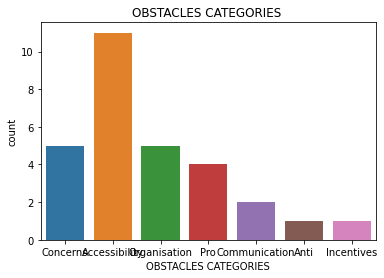

In [27]:
plt.title("OBSTACLES CATEGORIES ")
sns.countplot(Cat_dataset['OBSTACLES CATEGORIES'])
plt.show()

C:\Users\abideen.muhammed\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


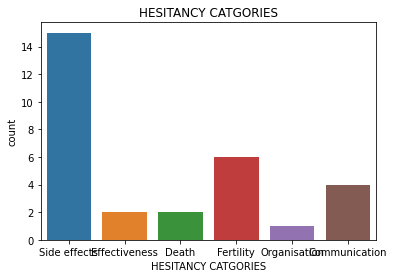

In [28]:
plt.title("HESITANCY CATGORIES")
sns.countplot(Cat_dataset['HESITANCY CATGORIES'])
plt.show()

C:\Users\abideen.muhammed\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


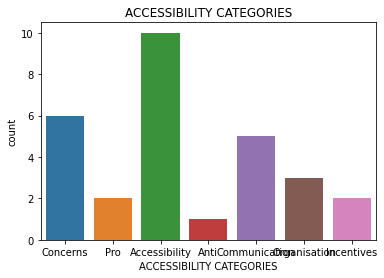

In [29]:
plt.title("ACCESSIBILITY CATEGORIES")
sns.countplot(Cat_dataset['ACCESSIBILITY CATEGORIES'])
plt.show()

# Sentiment Analysis
    Polarity and Subjectivity

In [30]:


from textblob import TextBlob
def sentiment_analysis(text):
    blob = TextBlob(text)
    pol = blob.sentiment.polarity
    subj = blob.sentiment.subjectivity
    if pol < 0:
        result = "negative"
    elif pol == 0:
        result = "neutral"
    else:
        result = "positive"
    return result
    #return  {"pol": {pol}, "subj": subj, "label": result}

In [31]:
def pol(text):
    blob = TextBlob(text)
    pol = blob.sentiment.polarity
    return pol

In [32]:
def subj(text):
    blob = TextBlob(text)
    subj = blob.sentiment.subjectivity
    return subj

In [33]:
dataset["Reasons for Hesitation_pol"] =dataset["Reasons for Hesitation"].apply(pol)
dataset["Reasons for Hesitation_subj"] =dataset["Reasons for Hesitation"].apply(subj)

In [34]:
dataset["Reasons for Hesitation_pol"]

0      -0.025000
1      -0.025000
2      -0.025000
3      -0.025000
4      -0.025000
          ...   
1680   -0.083333
1681   -0.083333
1682    0.000000
1683    0.000000
1684    0.000000
Name: Reasons for Hesitation_pol, Length: 1685, dtype: float64

In [35]:
dataset["Reasons for Hesitation_sent"] =dataset["Reasons for Hesitation"].apply(sentiment_analysis)
dataset["Obstacles_sent"] = dataset["Obstacles"].apply(sentiment_analysis)
dataset["Accessibility_sent"] = dataset["Accessibility "].apply(sentiment_analysis)


In [36]:
dataset["Reasons for Hesitation_sent"]

0       negative
1       negative
2       negative
3       negative
4       negative
          ...   
1680    negative
1681    negative
1682     neutral
1683     neutral
1684     neutral
Name: Reasons for Hesitation_sent, Length: 1685, dtype: object

In [37]:
dataset

,Respondent,Age,Gender,COVID-19 Jab?,Race,Any reason for Hesitation,Reasons for Hesitation,Hesistation Status,Trust Level,Safety Level,...,Accessibility,Obstacles,Obstacles_tk,Reasons for Hesitation_tk,Accessibility_tk,Reasons for Hesitation_pol,Reasons for Hesitation_subj,Reasons for Hesitation_sent,Obstacles_sent,Accessibility_sent
0,Staff,19,2,1,White,1.0,Different things health long run,NaN,Mostly trust,Mostly safe,...,Making appointments,hour half away campus,"[hour, half, away, campus]","[Different, things, health, long, run]","[Making, appointments]",-0.025000,0.500000,negative,negative,neutral
1,Student,20,2,0,White,2.0,Different things health long run,3.0,Mostly trust,Very safe,...,Making appointments,inability transportation vaccination sites,"[inability, transportation, vaccination, sites]","[Different, things, health, long, run]","[Making, appointments]",-0.025000,0.500000,negative,neutral,neutral
2,Student,19,1,0,White,2.0,Different things health long run,3.0,Mostly trust,Very safe,...,allowed exempt classes day,Scheduling,[Scheduling],"[Different, things, health, long, run]","[allowed, exempt, classes, day]",-0.025000,0.500000,negative,neutral,neutral
3,Student,44,1,0,White,2.0,Different things health long run,3.0,Mostly trust,Very safe,...,allowed exempt classes day,Scheduling,[Scheduling],"[Different, things, health, long, run]","[allowed, exempt, classes, day]",-0.025000,0.500000,negative,neutral,neutral
4,Staff,30,1,1,White,2.0,Different things health long run,0.0,Mostly trust,Very safe,...,allowed exempt classes day,Scheduling,[Scheduling],"[Different, things, health, long, run]","[allowed, exempt, classes, day]",-0.025000,0.500000,negative,neutral,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,Student,20,1,0,White,1.0,relative newness vaccine given slight hesitation,3.0,Mostly trust,Mostly safe,...,Mail delivery vaccines way distribute locally,vaccines offered oncampus,"[vaccines, offered, oncampus]","[relative, newness, vaccine, given, slight, he...","[Mail, delivery, vaccines, way, distribute, lo...",-0.083333,0.083333,negative,neutral,neutral
1681,Student,28,1,1,White,1.0,relative newness vaccine given slight hesitation,0.0,Mostly trust,Mostly safe,...,Mail delivery vaccines way distribute locally,vaccines offered oncampus,"[vaccines, offered, oncampus]","[relative, newness, vaccine, given, slight, he...","[Mail, delivery, vaccines, way, distribute, lo...",-0.083333,0.083333,negative,neutral,neutral
1682,Staff,28,1,1,White,1.0,Heard faces gotten paralyzed,0.0,Do not trust at all,Not safe at all,...,Mail delivery vaccines way distribute locally,vaccines offered oncampus,"[vaccines, offered, oncampus]","[Heard, faces, gotten, paralyzed]","[Mail, delivery, vaccines, way, distribute, lo...",0.000000,0.000000,neutral,neutral,neutral
1683,Student,19,1,0,White,2.0,Heard faces gotten paralyzed,3.0,Mostly trust,Mostly safe,...,Mail delivery vaccines way distribute locally,vaccines offered oncampus,"[vaccines, offered, oncampus]","[Heard, faces, gotten, paralyzed]","[Mail, delivery, vaccines, way, distribute, lo...",0.000000,0.000000,neutral,neutral,neutral


In [38]:
dataset["Reasons for Hesitation_sent"].value_counts()

neutral     807
negative    543
positive    335
Name: Reasons for Hesitation_sent, dtype: int64

In [39]:
dataset["Obstacles_sent"].value_counts()

neutral     1023
negative     352
positive     310
Name: Obstacles_sent, dtype: int64

In [40]:
dataset["Accessibility_sent"].value_counts()

neutral     1136
positive     465
negative      84
Name: Accessibility_sent, dtype: int64

C:\Users\abideen.muhammed\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Reasons for Hesitation_sent', ylabel='count'>

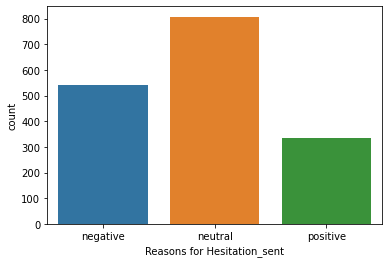

In [41]:
sns.countplot(dataset["Reasons for Hesitation_sent"])

C:\Users\abideen.muhammed\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Obstacles_sent', ylabel='count'>

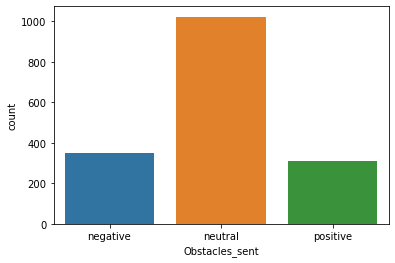

In [42]:
sns.countplot(dataset["Obstacles_sent"])

C:\Users\abideen.muhammed\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Accessibility_sent', ylabel='count'>

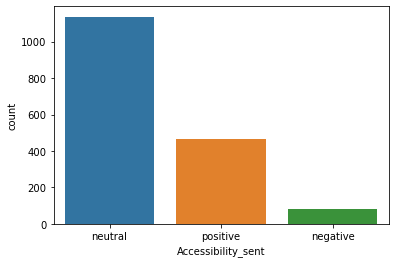

In [43]:
sns.countplot(dataset["Accessibility_sent"])

# Converting to numbers

In [44]:

#converting to numbers
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

dataset["Accessibility_n"] = lb.fit_transform(dataset["Accessibility "])
dataset["Obstacles_n"] = lb.fit_transform(dataset["Obstacles"])
dataset["Reasons for Hesitation_n"] = lb.fit_transform(dataset["Reasons for Hesitation"])
dataset["Respondent_n"] = lb.fit_transform(dataset["Respondent"])
dataset["Race_n"] = lb.fit_transform(dataset["Race"])
dataset["Confidence Level_n"] = lb.fit_transform(dataset["Confidence Level"])
dataset["Trust Level_n"] = lb.fit_transform(dataset["Trust Level"])
dataset["Safety Level_n"] = lb.fit_transform(dataset["Safety Level"])





Clustering

In [45]:
#clustering

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X = dataset[['Reasons for Hesitation_n', 'Obstacles_n']]
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
dataset['Cluster'] = kmeansmodel.fit_predict(X)


In [46]:
dataset['Cluster']

0       3
1       3
2       2
3       2
4       2
       ..
1680    0
1681    0
1682    3
1683    3
1684    3
Name: Cluster, Length: 1685, dtype: int32

In [47]:
dataset

,Respondent,Age,Gender,COVID-19 Jab?,Race,Any reason for Hesitation,Reasons for Hesitation,Hesistation Status,Trust Level,Safety Level,...,Accessibility_sent,Accessibility_n,Obstacles_n,Reasons for Hesitation_n,Respondent_n,Race_n,Confidence Level_n,Trust Level_n,Safety Level_n,Cluster
0,Staff,19,2,1,White,1.0,Different things health long run,NaN,Mostly trust,Mostly safe,...,neutral,201,417,39,0,18,3,2,0,3
1,Student,20,2,0,White,2.0,Different things health long run,3.0,Mostly trust,Very safe,...,neutral,201,425,39,1,18,4,2,3,3
2,Student,19,1,0,White,2.0,Different things health long run,3.0,Mostly trust,Very safe,...,neutral,335,211,39,1,18,4,2,3,2
3,Student,44,1,0,White,2.0,Different things health long run,3.0,Mostly trust,Very safe,...,neutral,335,211,39,1,18,4,2,3,2
4,Staff,30,1,1,White,2.0,Different things health long run,0.0,Mostly trust,Very safe,...,neutral,335,211,39,0,18,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,Student,20,1,0,White,1.0,relative newness vaccine given slight hesitation,3.0,Mostly trust,Mostly safe,...,neutral,200,652,322,1,18,3,2,0,0
1681,Student,28,1,1,White,1.0,relative newness vaccine given slight hesitation,0.0,Mostly trust,Mostly safe,...,neutral,200,652,322,1,18,3,2,0,0
1682,Staff,28,1,1,White,1.0,Heard faces gotten paralyzed,0.0,Do not trust at all,Not safe at all,...,neutral,200,652,62,0,18,0,1,1,3
1683,Student,19,1,0,White,2.0,Heard faces gotten paralyzed,3.0,Mostly trust,Mostly safe,...,neutral,200,652,62,1,18,3,2,0,3


Distribution Plot

C:\Users\abideen.muhammed\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abideen.muhammed\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


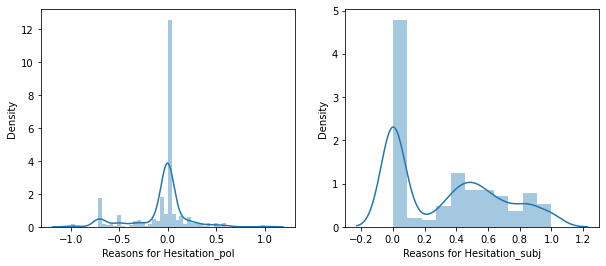

In [48]:
plt.rcParams['figure.figsize'] = (10,4)
plt.subplot(1,2,1)
sns.distplot(dataset["Reasons for Hesitation_pol"])

plt.subplot(1,2,2)
sns.distplot(dataset["Reasons for Hesitation_subj"])
plt.show()

Scattered plot of Reason for Hesitation: It's polarity and subjectivity

C:\Users\abideen.muhammed\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


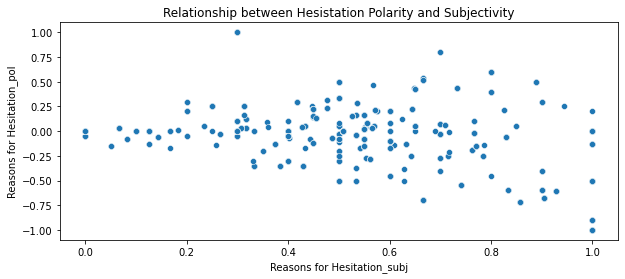

In [49]:
plt.title("Relationship between Hesistation Polarity and Subjectivity")
sns.scatterplot(dataset["Reasons for Hesitation_subj"], dataset["Reasons for Hesitation_pol"])
plt.show()

## Visualizing the Most Frequent Words

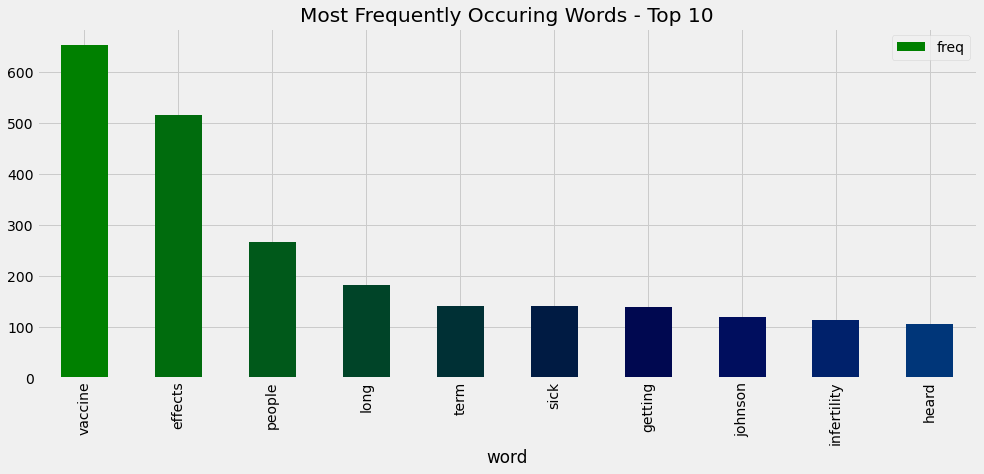

In [50]:
## Visualizing the Most Frequent Words

from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(dataset['Reasons for Hesitation'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.head(10).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occuring Words - Top 10")
plt.show()

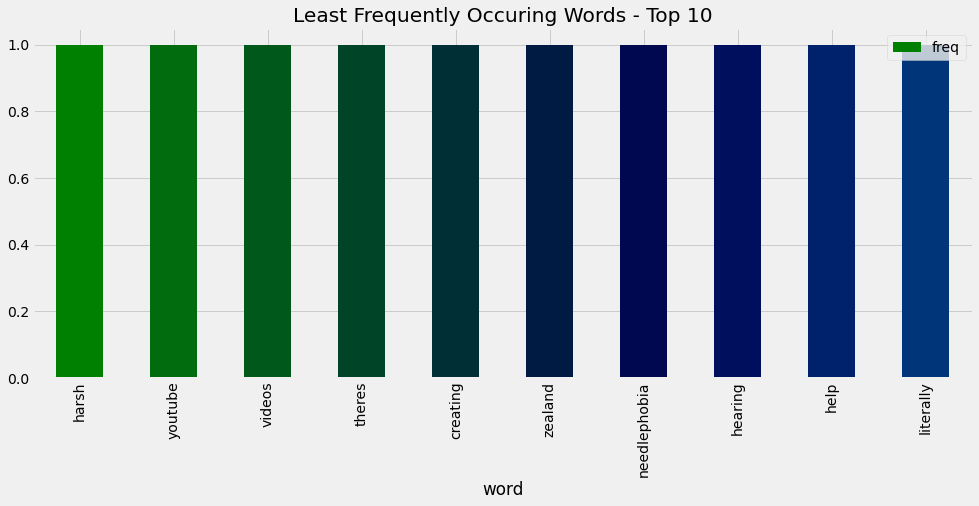

In [51]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(dataset['Reasons for Hesitation'])
sum_words = words.sum(axis=0)


words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.ocean(np.linspace(0, 1, 20))
frequency.tail(10).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Least Frequently Occuring Words - Top 10")
plt.show()

In [52]:
dataset.shape

(1685, 30)

# Extracting the Features using the Tfidf Vectorizer

In [53]:
# Extracting the Features using the Tfidf Vectorizer for obstacles

from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(max_features = 2500)
x = tf.fit_transform(obstacles).toarray()
y = dataset.iloc[:, 3].values

print(x.shape)
print(y.shape)

NameError: name 'obstacles' is not defined

In [ ]:
dataset

In [ ]:
def polarity(text):
    blob = TextBlob(text)
    pol = blob.sentiment.polarity
    if pol < 0:
        result = "negative"
    elif pol == 0:
        result = "neutral"
    else:
        result = "positive"
    return result

In [ ]:
dataset['pol']  = dataset["Reasons for Hesitation"].apply(polarity)

In [ ]:
dataset['pol']

In [ ]:
#Negativity and Positivty of Polarity

df = dataset[dataset['pol'] != 'neutral']

In [ ]:
df

In [ ]:
#converting to numbers
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

df["pol"] = lb.fit_transform(df["pol"])


In [ ]:
df

In [ ]:
X = tf.fit_transform(df['Reasons for Hesitation']).toarray()
y = df['pol']

In [ ]:
# splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.25, random_state = 40)

# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)


from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train2, y_train2)

y_pred = svm.predict(x_test2)

print("Testing Accuracy :", svm.score(x_test2, y_test2))

In [ ]:
from sklearn import metrics

In [ ]:
cf = metrics.confusion_matrix(y_test2, y_pred)

In [ ]:
print(cf)

In [ ]:
sns.heatmap(cf)

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])

In [ ]:
cm_display.plot()
plt.show()

In [ ]:

F1_score = metrics.f1_score(y_test2, y_pred)

In [ ]:
F1_score

In [ ]:
clas_rep = metrics.classification_report(y_test2, y_pred)

In [ ]:
print(clas_rep)

# Prediciton

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [ ]:
sentiment_label = df["Reasons for Hesitation"].factorize()


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
covid = dataset['Reasons for Hesitation'].values
tokenizer = Tokenizer(num_words=5000)
encoded_docs = tokenizer.texts_to_sequences(covid)
padded_sequence = pad_sequences(encoded_docs, maxlen=5000)

In [ ]:
text = input("Enter the text you want to predict")

In [ ]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=661)
    prediction = tr.predict(tw)
    #prediction = int(tr.predict(tw).round().item())
    if prediction == 0:
        return 'Negative. Not like to take the vaccine'
    else:
        return 'Positive. Likey to take the vaccine'
    #print("Predicted label: ", sentiment_label[1][prediction])

In [ ]:
print(f"The result of your prediction is:" {predict_sentiment(text)})

In [ ]:

import pickle

pickle.dump(svm,open('titanic_classifier.pkl','wb'))
model=pickle.load(open('titanic_classifier.pkl','rb'))